In [1]:
import numpy as np
from statsmodels.tsa.statespace.structural import UnobservedComponents

import matplotlib.pyplot as plt

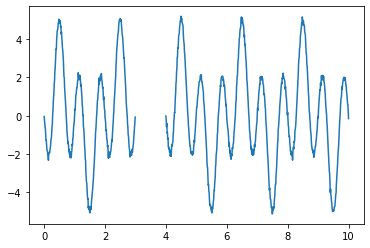

In [62]:
#generate fake data from two sinewaves superimposed together

X = np.linspace(0,10,1001)
Y = 2*np.sin(np.pi*X)-3*np.sin(3*np.pi*X)+np.random.normal(0, 0.1, 1001)
Y[300:400] = np.nan
plt.plot(X,Y)


In [63]:
model = UnobservedComponents(Y, 
                                    level='fixed intercept', 
                                    freq_seasonal=[{'period': 33*2,
                                                    'harmonics': 1},
                                                   {'period': 100*2,
                                                    'harmonics': 1}],
                                    irregular = True,
                                    exog = X)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/structural.py:413: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  % attribute, SpecificationWarning)


In [64]:
output_res=model.fit(method='powell', disp=True)

Optimization terminated successfully.
         Current function value: -0.415703
         Iterations: 4
         Function evaluations: 248


In [65]:
output_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Unobserved Components Results                                 
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1001
Model:                                fixed intercept   Log Likelihood                 416.119
                    + stochastic freq_seasonal(66(1))   AIC                           -826.237
                   + stochastic freq_seasonal(200(1))   BIC                           -811.526
Date:                                Fri, 13 Dec 2019   HQIC                          -820.645
Time:                                        15:40:39                                         
Sample:                                             0                                         
                                               - 1001                                         
Covariance Type:                                  opg                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
sigma2.freq_seasonal_66(1)      0.0006      0.000      1.445      0.149      -0.000       0.002
sigma2.freq_seasonal_200(1)     0.0203      0.001     17.505      0.000       0.018       0.023
beta.x1                         0.0088      0.059      0.148      0.883      -0.107       0.125
===================================================================================
Ljung-Box (Q):                      304.10   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               1.08   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

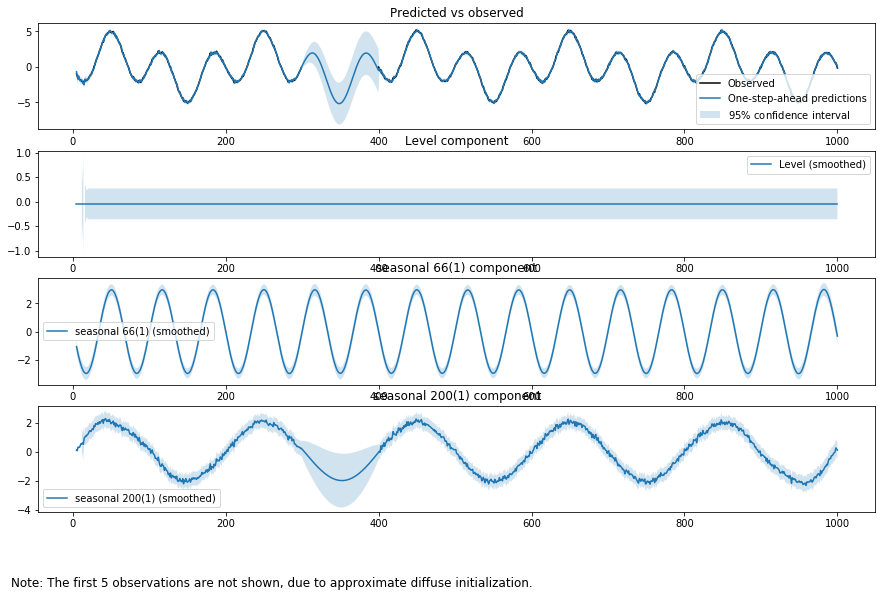

In [66]:
fig = output_res.plot_components(legend_loc='lower_right', figsize=(15,9))

In [67]:
simulate = output_res.get_prediction(300,400)

In [68]:
mean = simulate.predicted_mean

In [69]:
variance = simulate.var_pred_mean

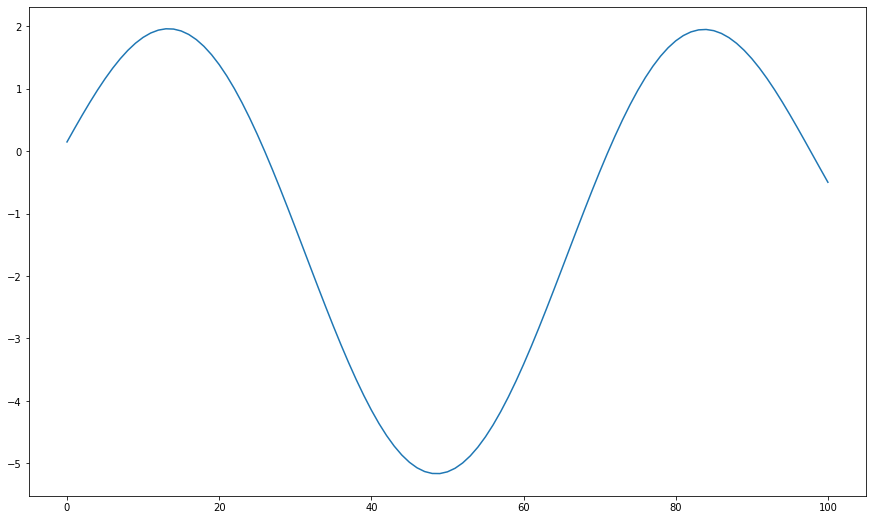

In [71]:
plt.figure(figsize=(15,9))
plt.plot(mean)

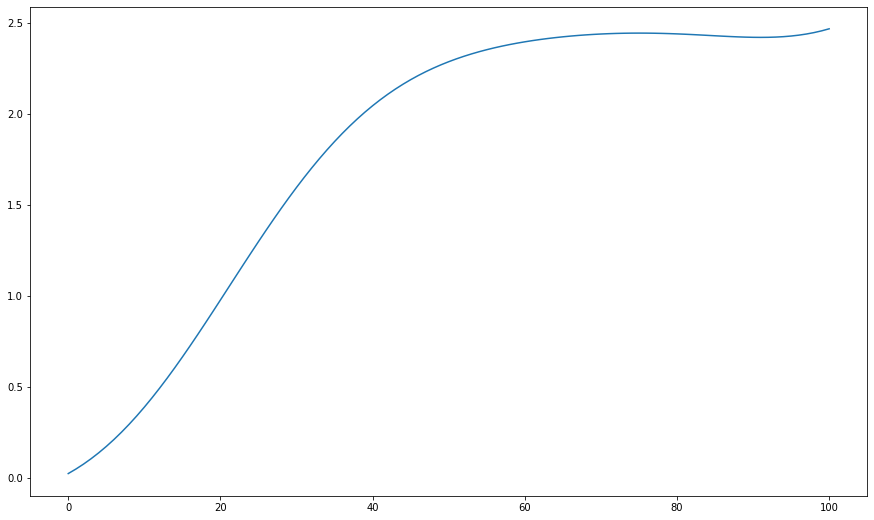

In [72]:
plt.figure(figsize=(15,9))
plt.plot(variance)

In [14]:
import inspect

In [ ]:
def event_prob(data, prediction_mean, prediction_var):
    return 1 - 1/np.sqrt(2*np.pi*prediction_var)*np.exp(-0.5*((data-prediction_mean)/np.sqrt(prediction_var))**2)

In [35]:
inspect.signature(output_res.simulate)

<Signature (nsimulations, measurement_shocks=None, state_shocks=None, initial_state=None)>

In [15]:
dir(output_res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_get_robustcov_results',
 '_init_kwds',
 '_k_states_by_type',
 '_rank',
 'aic',
 'autoregressive',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_params_approx',
 'cov_params_default',
 'cov_params_oim',
 'cov_params_opg',
 'cov_params_robust',
 'cov_params_robust_approx',
 'cov_params_robust_oim',
 'cov_type',
 'cycle',
 'data',
 'data_in_cache',
 'df_model',
 'df_resid',
 'f_test',
 'fi

In [8]:
model.parameters

OrderedDict([('freq_seasonal_var_0', 1), ('freq_seasonal_var_1', 1)])

In [9]:
model.param_names

['sigma2.freq_seasonal_66(1)', 'sigma2.freq_seasonal_200(1)']